# Лабораториска Вежба 4
# Надгледувано Учење
Мартин Поповски 186086

## Imports

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## Load dataset

In [2]:
columns = [
    'lettr',
    'x-box',
    'y-box',
    'width',
    'high',
    'onpix',
    'x-bar',
    'y-bar',
    'x2bar',
    'y2bar',
    'xybar',
    'x2ybr',
    'xy2br',
    'x-ege',
    'xegvy',
    'y-ege',
    'yegvx'
]

In [3]:
df = pd.read_csv('data/letter-recognition.data', header=None, names=columns)
df

,lettr,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [4]:
df.describe()

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


In [5]:
X = df.drop('lettr', axis=1)
X

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [6]:
y = df['lettr']
y

0        T
1        I
2        D
3        N
4        G
        ..
19995    D
19996    C
19997    T
19998    S
19999    A
Name: lettr, Length: 20000, dtype: object

## Visualizations

### Helper functions

In [7]:
def get_reduced_df(df_tmp, model, n_components):
    df_reduced = pd.DataFrame()
    x = pca.fit_transform(df_tmp)
    for n in range(n_components):
        df_reduced[f'x{n + 1}'] = x[:,n]
    return df_reduced

In [8]:
def plot_2d(df_reduced, color):
    fig, ax = plt.subplots(figsize=(20, 10))
    sns.scatterplot(x='x1', y='x2', data=df_reduced, hue=color, ax=ax)

### Correlation

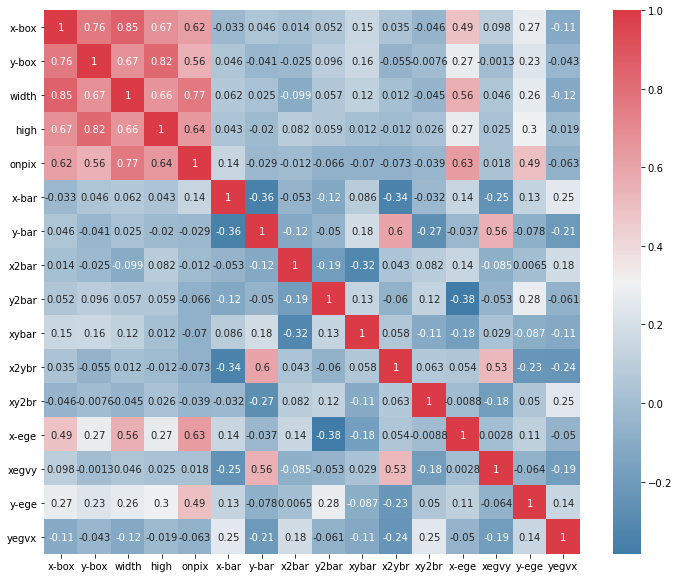

In [9]:
corr = df.corr(method='pearson')
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap=sns.diverging_palette(240, 10, as_cmap = True), ax=ax)
_ = plt.yticks(rotation=0)

#### Conclusion

The correlations make sense given the descriptions of the features.

### Class countplot

<AxesSubplot:xlabel='lettr', ylabel='count'>

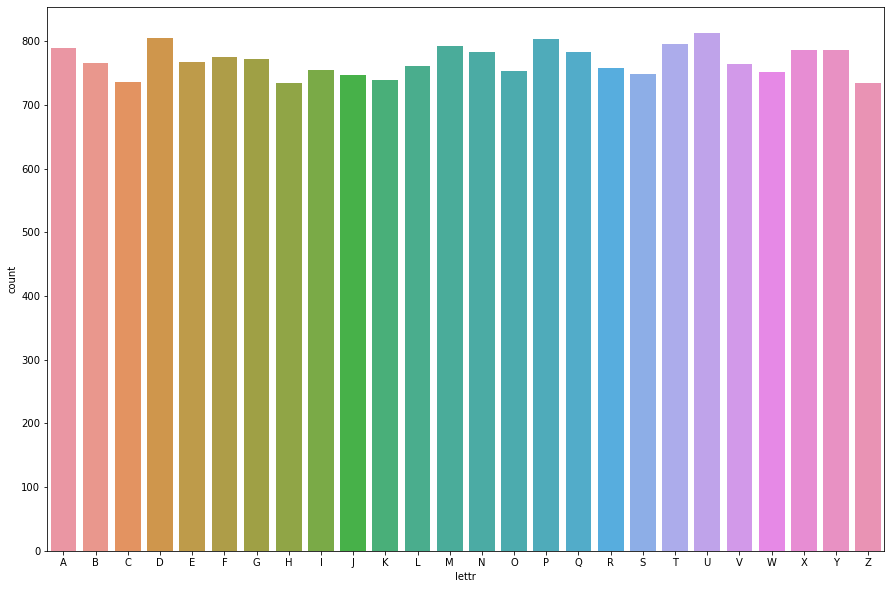

In [10]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.countplot(x='lettr', data=df, ax=ax, order=sorted(df['lettr'].unique()))

#### Conclusion

Balanced classes

### Dimension reduction

#### PCA

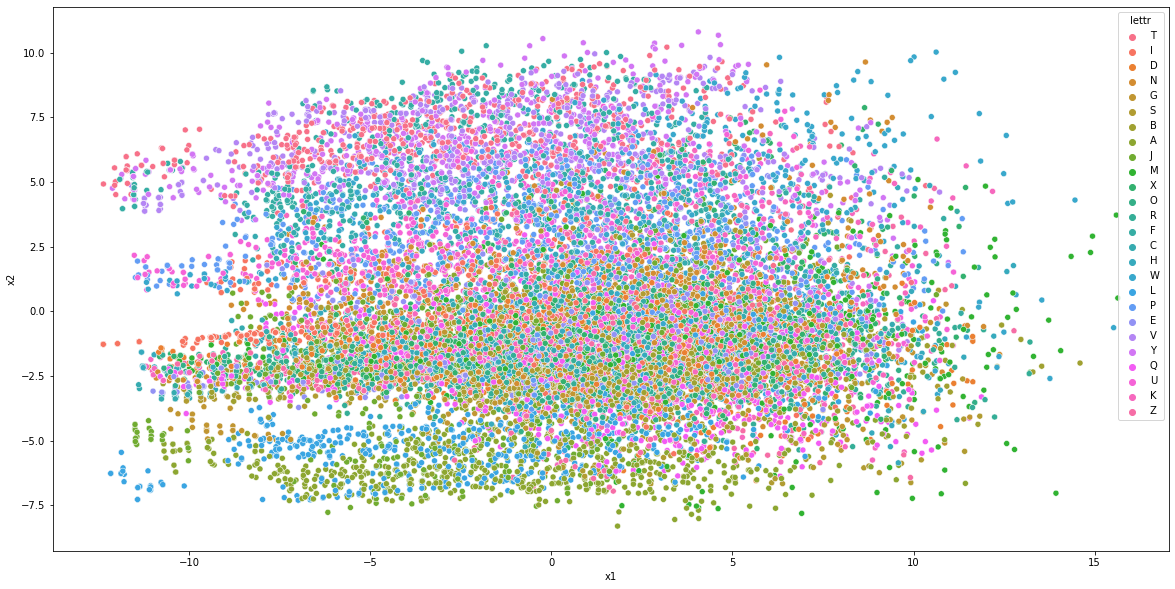

In [11]:
pca = PCA(n_components=2)
X_pca = get_reduced_df(X, pca, 2)
plot_2d(X_pca, df['lettr'])

#### TSNE

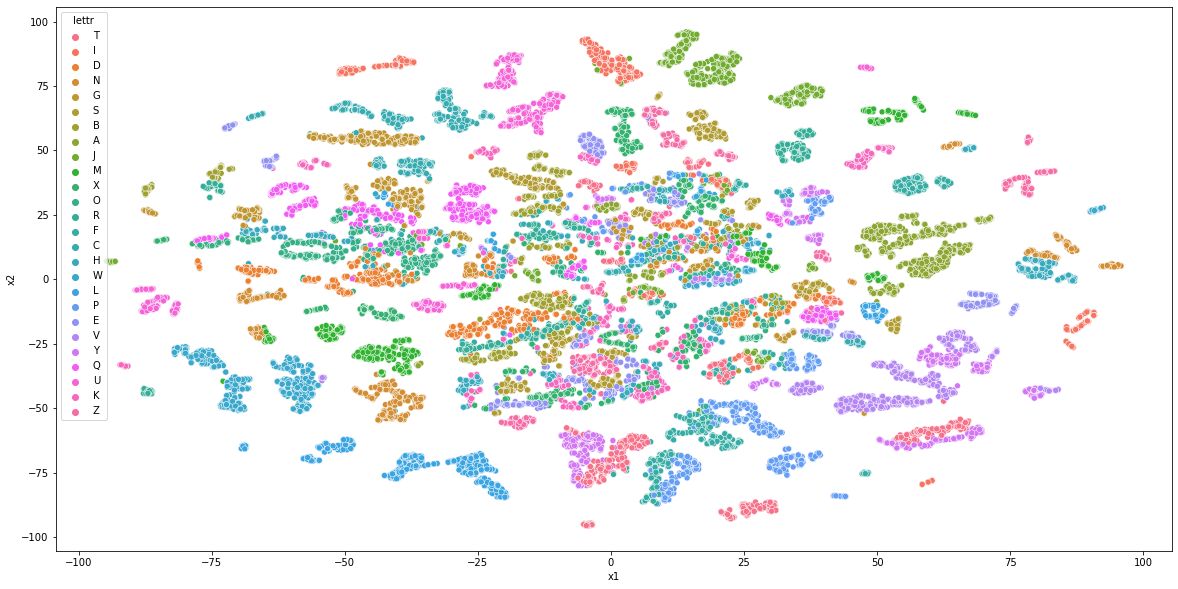

In [12]:
pca = TSNE(n_components=2)
X_tsne = get_reduced_df(X, pca, 2)
plot_2d(X_tsne, df['lettr'])

#### Conclusion

From the TSNE visualization we can see that most classes are in distinct groups. This is a good promise for higher model classification performances.

## Split train test sets

Data is split into first 16000 rows as train, the remaining 4000 as test

In [13]:
X_train = X[:16000]
X_test = X[16000:]
y_train = y[:16000]
y_test = y[16000:]

## Scale data

Fit on train set, transform both.

In [14]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=columns[1:])
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=columns[1:])

In [15]:
X_train_scaled.describe().apply(lambda s: s.apply('{0:.5f}'.format))  # suppress scientific notation

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
count,16000.00000,16000.00000,16000.00000,16000.00000,16000.00000,16000.00000,16000.00000,16000.00000,16000.00000,16000.00000,16000.00000,16000.00000,16000.00000,16000.00000,16000.00000,16000.00000
mean,0.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,-0.00000,0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000
std,1.00003,1.00003,1.00003,1.00003,1.00003,1.00003,1.00003,1.00003,1.00003,1.00003,1.00003,1.00003,1.00003,1.00003,1.00003,1.00003
min,-2.10653,-2.12752,-2.55457,-2.37160,-1.59663,-3.39628,-3.21898,-1.70656,-2.16806,-3.33382,-2.44940,-3.82600,-1.30155,-5.38316,-1.43196,-4.23878
25%,-0.53457,-0.61412,-0.55776,-0.60369,-0.68430,-0.43983,-0.64806,-0.60015,-0.49077,-0.51763,-0.55687,-0.44747,-0.87463,-0.22189,-0.65414,-0.49662
50%,-0.01058,-0.00876,-0.05856,0.28027,-0.22814,0.05291,-0.21957,-0.23135,-0.07144,-0.11531,-0.17837,0.03517,-0.02081,-0.22189,-0.26523,0.12708
75%,0.51341,0.59660,0.44064,0.72225,0.68419,0.54565,0.63740,0.50625,0.76721,0.68931,0.57864,0.51782,0.40610,0.42326,0.51258,0.12708
max,5.75328,2.41268,4.93346,4.25808,5.24581,3.99484,3.20832,3.82546,4.12180,2.70088,3.22817,3.41370,5.10212,4.29422,4.40165,4.49293


In [16]:
X_test_scaled.describe()

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.008810,0.009932,0.011326,0.014530,0.013058,0.012257,-0.025682,0.002374,0.017350,-0.009203,-0.032646,0.004525,-0.005657,-0.016411,0.018959,0.015436
std,1.012403,1.001073,1.028036,0.997348,0.995946,0.991464,0.981511,0.978566,0.991532,1.005681,0.978743,1.020838,0.978740,0.989251,0.991590,1.043202
min,-2.106527,-2.127518,-2.554572,-2.371604,-1.596625,-3.396280,-3.218980,-1.706558,-2.168063,-3.333816,-2.449396,-2.860705,-1.301545,-4.738005,-1.431956,-4.862471
25%,-0.534565,-0.614119,-0.557765,-0.603688,-0.684301,-0.439833,-0.648060,-0.600155,-0.490767,-0.517626,-0.556874,-0.447473,-0.447723,-0.221894,-0.654142,-0.496616
50%,-0.010578,-0.008759,-0.058563,0.280270,-0.228138,0.052908,-0.219573,-0.231354,-0.071442,-0.517626,-0.178370,0.035173,-0.020812,-0.221894,0.123672,0.127078
75%,0.513409,0.596601,0.440639,0.722249,0.684186,0.545649,0.208914,0.506249,0.767206,0.689313,0.578638,0.517819,0.406099,0.423264,0.512580,0.750771
max,5.229295,2.412681,4.434254,3.816102,5.245810,3.994837,3.208322,3.825460,4.121799,2.700877,3.228168,3.413697,5.102122,3.649058,4.401650,4.492933


### Conclusion

Train set shows mean of ~0 and std of ~1, this is because we fitted on the train set. While test set shows slight variation.

## Models

In [17]:
accuracies = {}

### Helper functions

In [18]:
def fit_summary(model, X_train, X_test, y_train, y_test, silent=False):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    if not silent:
        print(classification_report(y_test, y_pred))
    return accuracy_score(y_test, y_pred)

### LDA

In [19]:
model = LinearDiscriminantAnalysis()
accuracy = fit_summary(model, X_train_scaled, X_test_scaled, y_train, y_test)
accuracies['LDA'] = accuracy

              precision    recall  f1-score   support

           A       0.85      0.81      0.83       156
           B       0.51      0.74      0.60       136
           C       0.65      0.72      0.68       142
           D       0.64      0.83      0.72       167
           E       0.70      0.46      0.56       152
           F       0.60      0.68      0.64       153
           G       0.46      0.45      0.45       164
           H       0.46      0.44      0.45       151
           I       0.87      0.82      0.85       165
           J       0.84      0.74      0.79       148
           K       0.60      0.62      0.61       146
           L       0.93      0.71      0.81       157
           M       0.83      0.87      0.85       144
           N       0.81      0.80      0.80       166
           O       0.54      0.63      0.58       139
           P       0.81      0.71      0.76       168
           Q       0.62      0.57      0.59       168
           R       0.62    

### QDA

In [20]:
model = QuadraticDiscriminantAnalysis()
accuracy = fit_summary(model, X_train_scaled, X_test_scaled, y_train, y_test)
accuracies['QDA'] = accuracy

              precision    recall  f1-score   support

           A       0.95      0.94      0.95       156
           B       0.88      0.90      0.89       136
           C       0.89      0.84      0.86       142
           D       0.81      0.93      0.86       167
           E       0.92      0.81      0.86       152
           F       0.83      0.88      0.85       153
           G       0.80      0.86      0.83       164
           H       0.80      0.69      0.74       151
           I       0.95      0.82      0.88       165
           J       0.93      0.91      0.92       148
           K       0.74      0.86      0.79       146
           L       0.96      0.86      0.91       157
           M       0.88      0.95      0.92       144
           N       0.96      0.84      0.90       166
           O       0.80      0.88      0.84       139
           P       0.91      0.88      0.90       168
           Q       0.89      0.88      0.88       168
           R       0.83    

### Naive Bayes

In [21]:
model = GaussianNB()
accuracy = fit_summary(model, X_train_scaled, X_test_scaled, y_train, y_test)
accuracies['Naive Bayes'] = accuracy

              precision    recall  f1-score   support

           A       0.83      0.84      0.84       156
           B       0.45      0.66      0.54       136
           C       0.76      0.73      0.75       142
           D       0.54      0.69      0.60       167
           E       0.67      0.38      0.49       152
           F       0.68      0.73      0.71       153
           G       0.54      0.57      0.56       164
           H       0.50      0.27      0.35       151
           I       0.55      0.78      0.65       165
           J       0.78      0.74      0.76       148
           K       0.43      0.45      0.44       146
           L       0.95      0.75      0.84       157
           M       0.66      0.90      0.76       144
           N       0.83      0.57      0.68       166
           O       0.43      0.67      0.52       139
           P       0.85      0.72      0.78       168
           Q       0.62      0.55      0.59       168
           R       0.56    

### Logistic Regression

In [22]:
model = LogisticRegression(solver='liblinear')
accuracy = fit_summary(model, X_train_scaled, X_test_scaled, y_train, y_test)
accuracies['Logistic Regression'] = accuracy

              precision    recall  f1-score   support

           A       0.84      0.84      0.84       156
           B       0.60      0.79      0.69       136
           C       0.69      0.71      0.70       142
           D       0.70      0.84      0.76       167
           E       0.77      0.62      0.69       152
           F       0.72      0.72      0.72       153
           G       0.48      0.31      0.38       164
           H       0.40      0.42      0.41       151
           I       0.91      0.83      0.87       165
           J       0.85      0.80      0.83       148
           K       0.61      0.61      0.61       146
           L       0.79      0.77      0.78       157
           M       0.82      0.89      0.85       144
           N       0.81      0.64      0.71       166
           O       0.56      0.49      0.52       139
           P       0.82      0.76      0.79       168
           Q       0.57      0.73      0.64       168
           R       0.64    

### Linear SVC

In [23]:
model = LinearSVC(dual=False)
accuracy = fit_summary(model, X_train_scaled, X_test_scaled, y_train, y_test)
accuracies['Linear SVC'] = accuracy

              precision    recall  f1-score   support

           A       0.82      0.85      0.84       156
           B       0.57      0.79      0.66       136
           C       0.61      0.74      0.67       142
           D       0.68      0.83      0.75       167
           E       0.72      0.51      0.60       152
           F       0.73      0.65      0.69       153
           G       0.55      0.24      0.33       164
           H       0.38      0.32      0.35       151
           I       0.87      0.82      0.85       165
           J       0.79      0.78      0.79       148
           K       0.62      0.58      0.60       146
           L       0.76      0.77      0.76       157
           M       0.76      0.90      0.82       144
           N       0.74      0.71      0.72       166
           O       0.64      0.39      0.48       139
           P       0.77      0.77      0.77       168
           Q       0.58      0.70      0.63       168
           R       0.62    

### KNN

Finding best n_neighbors

   n_neighbors  accuracy
0            1   0.95200
1            2   0.93725
2            3   0.94250
3            4   0.94700
4            5   0.94650
5            6   0.94275
6            7   0.94275
7            8   0.93925
8            9   0.94075
9           10   0.93525


<AxesSubplot:xlabel='n_neighbors', ylabel='accuracy'>

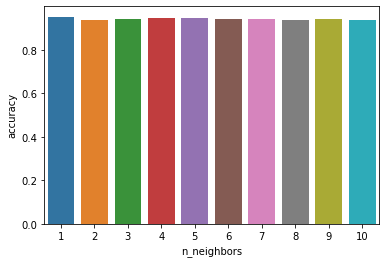

In [24]:
results = []
for n_neighbors in range(1, 11):
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    accuracy = fit_summary(model, X_train_scaled, X_test_scaled, y_train, y_test, silent=True)
    results.append((n_neighbors, accuracy))
df_knn_results = pd.DataFrame(results, columns=['n_neighbors', 'accuracy'])
print(df_knn_results)
sns.barplot(x='n_neighbors', y='accuracy', data=df_knn_results)

In [25]:
model = KNeighborsClassifier(n_neighbors=1)
accuracy = fit_summary(model, X_train_scaled, X_test_scaled, y_train, y_test)
accuracies['KNN'] = accuracy

              precision    recall  f1-score   support

           A       0.98      0.99      0.98       156
           B       0.93      0.95      0.94       136
           C       0.96      0.96      0.96       142
           D       0.95      0.96      0.96       167
           E       0.94      0.93      0.94       152
           F       0.95      0.91      0.93       153
           G       0.97      0.95      0.96       164
           H       0.89      0.83      0.86       151
           I       0.95      0.97      0.96       165
           J       0.95      0.94      0.95       148
           K       0.91      0.92      0.92       146
           L       0.97      0.97      0.97       157
           M       0.98      0.97      0.97       144
           N       0.97      0.94      0.95       166
           O       0.91      0.96      0.94       139
           P       0.94      0.95      0.94       168
           Q       0.96      0.95      0.95       168
           R       0.90    

### MLP

In [26]:
model = MLPClassifier(solver='adam', hidden_layer_sizes=(100,), max_iter=1000, random_state=0)
accuracy = fit_summary(model, X_train_scaled, X_test_scaled, y_train, y_test)
accuracies['MLP(100)'] = accuracy

              precision    recall  f1-score   support

           A       0.99      0.96      0.97       156
           B       0.91      0.96      0.94       136
           C       0.98      0.96      0.97       142
           D       0.94      0.98      0.96       167
           E       0.96      0.95      0.95       152
           F       0.92      0.97      0.94       153
           G       0.96      0.95      0.95       164
           H       0.91      0.90      0.91       151
           I       0.95      0.93      0.94       165
           J       0.90      0.95      0.92       148
           K       0.90      0.95      0.92       146
           L       0.95      0.94      0.95       157
           M       0.96      1.00      0.98       144
           N       0.96      0.92      0.94       166
           O       0.94      0.95      0.95       139
           P       0.98      0.96      0.97       168
           Q       0.97      0.96      0.97       168
           R       0.97    

In [27]:
model = MLPClassifier(solver='adam', hidden_layer_sizes=(100, 50), max_iter=1000, random_state=0)
accuracy = fit_summary(model, X_train_scaled, X_test_scaled, y_train, y_test)
accuracies['MLP(100,50)'] = accuracy

              precision    recall  f1-score   support

           A       0.97      0.97      0.97       156
           B       0.93      0.96      0.94       136
           C       0.97      0.97      0.97       142
           D       0.91      0.96      0.94       167
           E       0.97      0.93      0.95       152
           F       0.92      0.95      0.94       153
           G       0.94      0.95      0.94       164
           H       0.93      0.89      0.91       151
           I       0.96      0.95      0.95       165
           J       0.94      0.96      0.95       148
           K       0.93      0.96      0.95       146
           L       0.97      0.96      0.96       157
           M       0.97      0.99      0.98       144
           N       0.97      0.93      0.95       166
           O       0.93      0.93      0.93       139
           P       0.95      0.93      0.94       168
           Q       0.97      0.96      0.96       168
           R       0.93    

In [28]:
model = MLPClassifier(solver='adam', hidden_layer_sizes=(100, 50, 50, 50), max_iter=1000, random_state=0)
accuracy = fit_summary(model, X_train_scaled, X_test_scaled, y_train, y_test)
accuracies['MLP(100,50,50,50)'] = accuracy

              precision    recall  f1-score   support

           A       0.98      0.96      0.97       156
           B       0.94      0.96      0.95       136
           C       0.97      0.97      0.97       142
           D       0.92      0.95      0.94       167
           E       0.98      0.93      0.96       152
           F       0.94      0.97      0.95       153
           G       0.96      0.95      0.95       164
           H       0.91      0.91      0.91       151
           I       0.94      0.97      0.96       165
           J       0.96      0.93      0.95       148
           K       0.97      0.95      0.96       146
           L       0.96      0.95      0.96       157
           M       0.99      0.97      0.98       144
           N       0.95      0.95      0.95       166
           O       0.93      0.94      0.94       139
           P       0.98      0.94      0.96       168
           Q       0.95      0.96      0.95       168
           R       0.93    

In [29]:
model = MLPClassifier(solver='adam', hidden_layer_sizes=(100, 100), max_iter=1000, random_state=0)
accuracy = fit_summary(model, X_train_scaled, X_test_scaled, y_train, y_test)
accuracies['MLP(100,100)'] = accuracy

              precision    recall  f1-score   support

           A       1.00      0.97      0.98       156
           B       0.92      0.98      0.95       136
           C       0.97      0.99      0.98       142
           D       0.91      0.96      0.94       167
           E       0.99      0.97      0.98       152
           F       0.96      0.97      0.96       153
           G       0.96      0.98      0.97       164
           H       0.90      0.88      0.89       151
           I       0.97      0.95      0.96       165
           J       0.92      0.97      0.95       148
           K       0.94      0.94      0.94       146
           L       0.97      0.94      0.96       157
           M       0.98      0.97      0.98       144
           N       0.97      0.95      0.96       166
           O       0.98      0.94      0.96       139
           P       0.97      0.96      0.97       168
           Q       0.97      0.97      0.97       168
           R       0.95    

### Decision Tree

In [30]:
model = DecisionTreeClassifier()
accuracy = fit_summary(model, X_train_scaled, X_test_scaled, y_train, y_test)
accuracies['Decision Tree'] = accuracy

              precision    recall  f1-score   support

           A       0.95      0.92      0.93       156
           B       0.80      0.87      0.83       136
           C       0.93      0.87      0.90       142
           D       0.83      0.87      0.85       167
           E       0.79      0.80      0.79       152
           F       0.86      0.88      0.87       153
           G       0.88      0.81      0.84       164
           H       0.80      0.80      0.80       151
           I       0.90      0.91      0.90       165
           J       0.90      0.93      0.91       148
           K       0.86      0.86      0.86       146
           L       0.93      0.93      0.93       157
           M       0.95      0.92      0.94       144
           N       0.87      0.87      0.87       166
           O       0.79      0.85      0.82       139
           P       0.88      0.88      0.88       168
           Q       0.84      0.87      0.85       168
           R       0.85    

### Random Forest

In [31]:
model = RandomForestClassifier()
accuracy = fit_summary(model, X_train_scaled, X_test_scaled, y_train, y_test)
accuracies['Random Forest'] = accuracy

              precision    recall  f1-score   support

           A       0.99      0.99      0.99       156
           B       0.90      0.97      0.94       136
           C       0.99      0.96      0.98       142
           D       0.91      0.99      0.95       167
           E       0.95      0.95      0.95       152
           F       0.96      0.97      0.96       153
           G       0.96      0.96      0.96       164
           H       0.95      0.88      0.91       151
           I       0.97      0.95      0.96       165
           J       0.97      0.95      0.96       148
           K       0.94      0.92      0.93       146
           L       0.99      0.97      0.98       157
           M       0.98      1.00      0.99       144
           N       0.98      0.93      0.95       166
           O       0.93      0.97      0.95       139
           P       0.96      0.93      0.95       168
           Q       0.96      0.96      0.96       168
           R       0.92    

## Results

In [32]:
df_results = pd.DataFrame(accuracies.items(), columns=['Model', 'Accuracy'])

In [33]:
df_results

,Model,Accuracy
0,LDA,0.68825
1,QDA,0.87500
2,Naive Bayes,0.62525
3,Logistic Regression,0.71400
4,Linear SVC,0.69675
5,KNN,0.95200
6,MLP(100),0.95225
7,"MLP(100,50)",0.95700
8,"MLP(100,50,50,50)",0.95625
9,"MLP(100,100)",0.96425


<AxesSubplot:xlabel='Accuracy', ylabel='Model'>

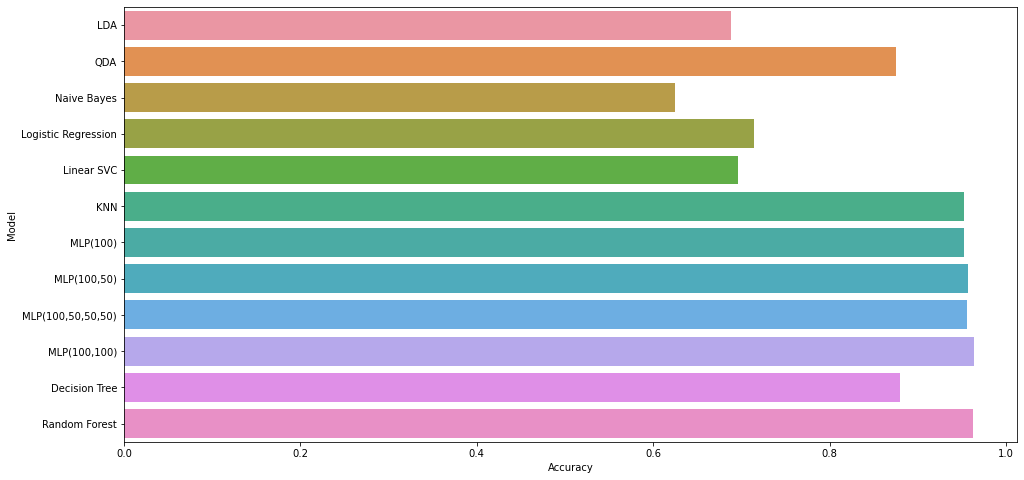

In [34]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.barplot(x='Accuracy', y='Model', data=df_results, ax=ax)

### Conclusion

Best performing models for this dataset are KNN, MLP, and Random Forest.